# Question-1

In [64]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import astroML

In [65]:
N=[1,5,10]
np.random.seed(50)
x = np.random.chisquare(3,(max(N), int(1E6)))

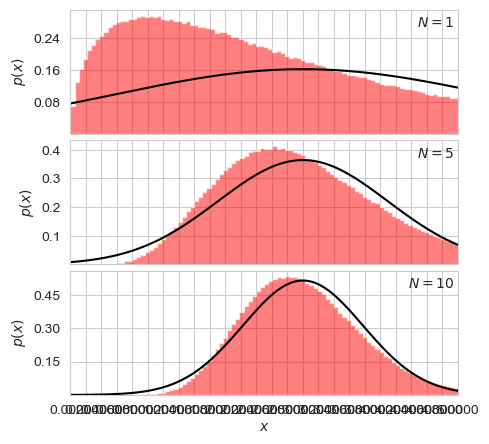

In [70]:
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)

    # take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    # histogram the data
    ax.hist(x_i, bins=np.linspace(0, 5,95),
           histtype='stepfilled', alpha=0.5, density=True,color='red')

    # plot the expected gaussian pdf
    mu = 3
    sigma = np.sqrt(2*3) / np.sqrt(N[i])
    dist = norm(mu, sigma)
    x_pdf = np.linspace(-0.5, 5, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-k')

    ax.set_xlim(0.0, 5)
    ax.set_ylim(0.001, None)

    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.99, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
        ax.set_xlabel('$x$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$')

plt.show()

# Question-2

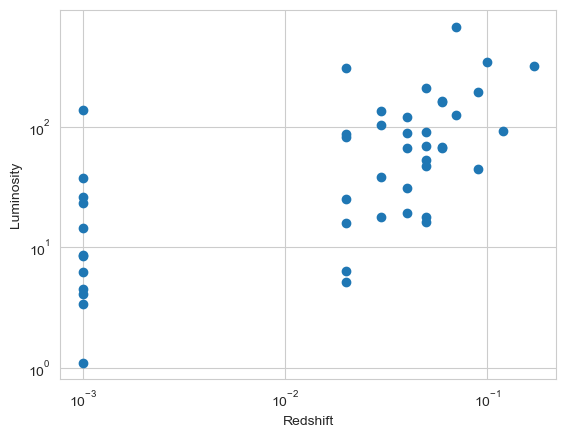

Spearman correlation coefficient:  0.6596325957535454
Spearman p-value:  6.166489759081011e-07
Pearson correlation coefficient:  0.5144497852670242
Pearson p-value:  0.0002546471657612425
Kendall-tau correlation coefficient:  0.5029584682704178
Kendall-tau p-value:  2.9696862274734036e-06


In [67]:
from scipy import stats
# Read the data from the url
data = pd.read_csv("http://www.iith.ac.in/~shantanud/test.dat", delimiter=' ', header=None, names=['Luminosity', 'Redshift'],skiprows=1)


# Plot the data on a log-log scale
plt.loglog(data['Redshift'], data['Luminosity'], 'o')
plt.xlabel('Redshift')
plt.ylabel('Luminosity')
plt.show()

# Calculate the correlation coefficients and p-values
spearman_coef, spearman_pvalue = stats.spearmanr(data['Redshift'], data['Luminosity'])
pearson_coef, pearson_pvalue = stats.pearsonr(data['Redshift'], data['Luminosity'])
kendall_coef, kendall_pvalue = stats.kendalltau(data['Redshift'], data['Luminosity'])

print("Spearman correlation coefficient: ", spearman_coef)
print("Spearman p-value: ", spearman_pvalue)
print("Pearson correlation coefficient: ", pearson_coef)
print("Pearson p-value: ", pearson_pvalue)
print("Kendall-tau correlation coefficient: ", kendall_coef)
print("Kendall-tau p-value: ", kendall_pvalue)

# Question-3

In [33]:
x = np.arange(0, 20, 1)
y = np.array([2.75, 7.8, 11.64, 13.79, 14.20, 13.15, 11.14, 8.72, 6.34, 
              4.3, 2.73, 1.62, 0.91, 0.48, 0.24, 0.11, 0.05, 0.02, 0.01, 0.00])

In [34]:
def weib_dist(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

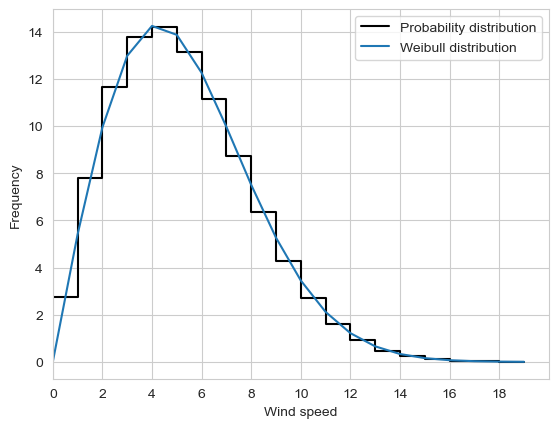

In [35]:
plt.xlim(0, 20)
plt.xticks(np.arange(min(x), max(x)+1, 2))
plt.step(x, y, where='post',color='black')
plt.plot(x, weib_dist(x, 6., 2.)*100)
plt.legend(['Probability distribution', 'Weibull distribution'])
plt.xlabel('Wind speed')
plt.ylabel('Frequency')
plt.show()

# Question-4

In [60]:
num_1= np.random.normal(0,1,1001)
print("1000 random numbers from a standard normal distribution:")

1000 random numbers from a standard normal distribution:


In [61]:
num_2= np.random.normal(0,1,1001)
print("1000 random numbers from a standard normal distribution:")

1000 random numbers from a standard normal distribution:


In [62]:
from scipy.stats import pearsonr
res, p = pearsonr(num_1, num_2)
print("pearson correlation coefficient is {}".format(a))
print("p-value is {}".format(b))

pearson correlation coefficient is 0.023725744522865067
p-value is 0.4535914290060633


In [63]:
from scipy.stats import ttest_ind
stat, p_t = ttest_ind(num_1, num_2)
print("p-value from t-distribution is {}".format(p_t))

p-value from t-distribution is 0.42209310892774865
